In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [16]:
df = pd.read_csv("climate_annual.txt", delim_whitespace=True)
df2 = df.set_index("State")
df3 = df2.loc["California":"California", ["Year", "PCP", "ZNDX"]]

In [17]:
print(df3.ZNDX.values)

ZNDX_array = df3.ZNDX.values
print(ZNDX_array.reshape(-1,1).shape)

result = []
for i in range(len(ZNDX_array) - 2):
    result.append([ZNDX_array[i], ZNDX_array[i+1], ZNDX_array[i+2]])
ZNDX_newx = np.array(result)
ZNDX_newy = df3.ZNDX.values[3:].reshape(-1,1)

ZNDX_newx_train = ZNDX_newx[:-6]
ZNDX_newy_train = ZNDX_newy[:-5]
ZNDX_newx_test = ZNDX_newx[-6:]
ZNDX_newy_test = ZNDX_newy[-5:]

print(ZNDX_newx_test)
print(ZNDX_newy_test)
print(ZNDX_newx_test.shape)
print(ZNDX_newy_test.shape)

[ -4.36  -6.81  -0.68   9.9    2.69   4.63  -9.29   7.1   -4.32   9.41
   4.12   2.83  -6.13   4.81  -1.41   0.79 -18.29 -17.11   9.3    2.51
   2.6    0.96  20.    30.01  -3.28 -11.92  -0.72 -11.87  -5.79  -9.01
 -16.03  -5.36  -7.91   7.27  -8.86  20.59  12.48  -6.67  29.06  -5.38
  -4.56  -7.58 -10.15  -0.9   -6.82  16.07  -0.67 -18.64 -14.24 -10.55
  13.93   2.91  -3.95 -22.27 -20.26 -16.66   1.29]
(57, 1)
[[-10.55  13.93   2.91]
 [ 13.93   2.91  -3.95]
 [  2.91  -3.95 -22.27]
 [ -3.95 -22.27 -20.26]
 [-22.27 -20.26 -16.66]
 [-20.26 -16.66   1.29]]
[[ -3.95]
 [-22.27]
 [-20.26]
 [-16.66]
 [  1.29]]
(6, 3)
(5, 1)


(49,)
(6,)
0.971047068009
[-16.66         1.29         0.97104707]
[ 0.81690743]
[ 1.29        0.97104707  0.81690743]
[-0.14109654]
60
55
(54, 1)


/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/kejiawu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:34: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/kejiawu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: FutureWarning: reshape is deprecated an

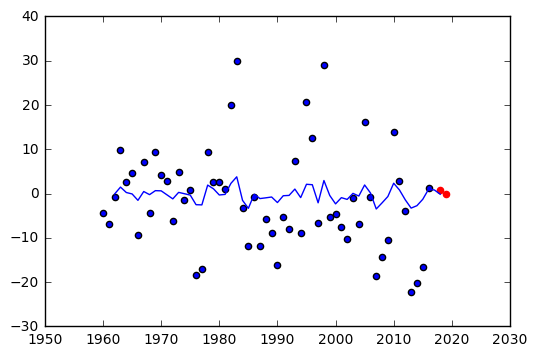

In [18]:
#Lasso regression
regr = linear_model.Lasso()
regr.fit(ZNDX_newx_train, ZNDX_newy_train)

ZNDX_lassoy_train = regr.predict(ZNDX_newx_train)
ZNDX_lassoy_test = regr.predict(ZNDX_newx_test)

print(ZNDX_lassoy_train.shape)
print(ZNDX_lassoy_test.shape)

year_all = np.append(df3.Year.values, [2017, 2018, 2019])
y_lasso = np.append(ZNDX_lassoy_train, ZNDX_lassoy_test)

ZNDX_17_y = y_lasso[-1]
print(ZNDX_17_y)
ZNDX_18_x = np.append(ZNDX_array[-2:], ZNDX_17_y)
print(ZNDX_18_x)
ZNDX_18_y = regr.predict(ZNDX_18_x)
print(ZNDX_18_y)

ZNDX_18 = ZNDX_18_y.item(0)
ZNDX_19_x = np.append(ZNDX_18_x[-2:], ZNDX_18)
print(ZNDX_19_x)
ZNDX_19_y = regr.predict(ZNDX_19_x)
print(ZNDX_19_y)
ZNDX_19 = ZNDX_19_y.item(0)

y_lasso_all = np.append(y_lasso, [ZNDX_18, ZNDX_19])

print(year_all.shape[0])
print(y_lasso.shape[0])
print(df3.Year[3:].reshape(-1,1).shape)

plt.figure()
plt.scatter(df3.Year.reshape(-1,1), df3.ZNDX)
#plt.plot(df.Year[2:-1].reshape(-1,1), y_lasso[:-1])
plt.scatter(year_all[-2:].reshape(-1,1), y_lasso_all[-2:], color='red')
plt.plot(year_all[2:-1].reshape(-1,1), y_lasso_all)
plt.show()

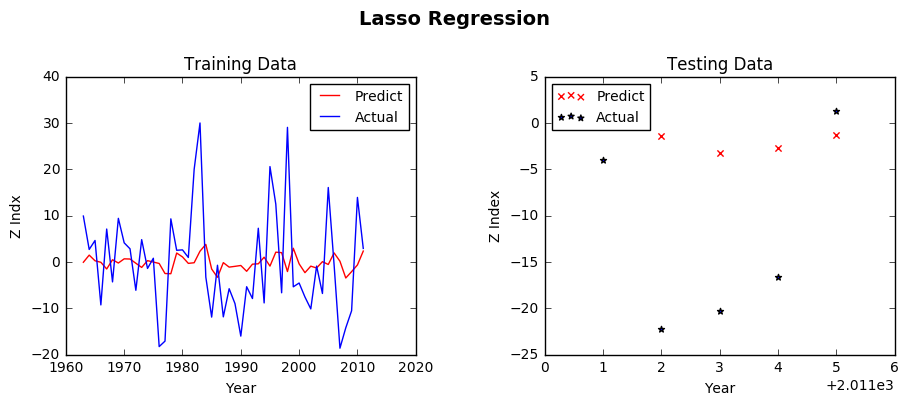

In [19]:
fig = plt.figure(figsize=(10,4.5))
fig.suptitle('Lasso Regression', fontsize=14, fontweight='bold')

#Plot for training data
fig.add_subplot(121)
plt.plot(df3.Year[3:-5],regr.predict(ZNDX_newx_train),label='Predict',c='r')
plt.plot(df3.Year[3:-5],ZNDX_newy_train,label='Actual')
plt.legend(loc=0,fontsize=10)
plt.title('Training Data')
plt.xlabel('Year')
plt.ylabel('Z Indx')
         
#Plot for testing data
fig.add_subplot(122)
plt.scatter(df3.Year[-5:],regr.predict(ZNDX_newx_test)[:-1],marker='x',c='r',label='Predict')
plt.scatter(df3.Year[-5:],ZNDX_newy_test, marker='*',label='Actual')
plt.legend(loc=2,fontsize=10)
plt.title('Testing Data')
plt.xlabel('Year')
plt.ylabel('Z Index')

plt.tight_layout(pad=4, w_pad=4)
plt.show()